In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('/kaggle/input/consumer-complaints/complaints.csv')
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-09-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,77077,NaN,NaN,Web,2025-09-18,In progress,Yes,NaN,16016736
2,2025-09-04,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IL,60619,NaN,NaN,Web,2025-09-04,In progress,Yes,NaN,15722832
3,2025-09-18,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11434,NaN,NaN,Web,2025-09-18,In progress,Yes,NaN,16028872
4,2025-09-05,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NC,283XX,NaN,NaN,Web,2025-09-05,In progress,Yes,NaN,15762150


In [4]:
categories = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}

df = df[df['Product'].isin(categories.keys())]  # filter only relevant rows
df['label'] = df['Product'].map(categories)


In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z ]', '', text)
    text = " ".join([word for word in text.split() if word not in stop])
    return text

df['clean_text'] = df['Consumer complaint narrative'].apply(clean_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.7263
              precision    recall  f1-score   support

           0       0.70      0.98      0.82    432567
           1       0.87      0.34      0.49    175309
           2       0.64      0.10      0.17      6396
           3       0.92      0.29      0.44     85092

    accuracy                           0.73    699364
   macro avg       0.78      0.43      0.48    699364
weighted avg       0.77      0.73      0.68    699364



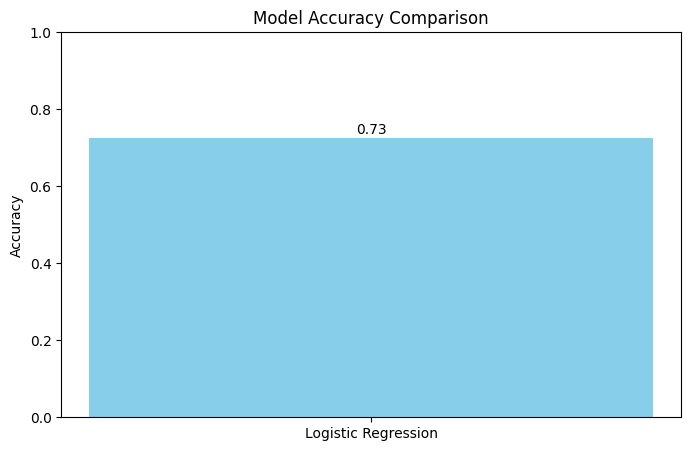


Naive Bayes Accuracy: 0.7152
              precision    recall  f1-score   support

           0       0.70      0.97      0.81    432567
           1       0.82      0.32      0.46    175309
           2       0.49      0.07      0.13      6396
           3       0.81      0.30      0.43     85092

    accuracy                           0.72    699364
   macro avg       0.71      0.41      0.46    699364
weighted avg       0.74      0.72      0.67    699364


SVM Accuracy: 0.7276
              precision    recall  f1-score   support

           0       0.70      0.98      0.82    432567
           1       0.87      0.34      0.49    175309
           2       0.78      0.09      0.16      6396
           3       0.92      0.29      0.44     85092

    accuracy                           0.73    699364
   macro avg       0.82      0.42      0.48    699364
weighted avg       0.77      0.73      0.68    699364



In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# Store results
results = {}

# Create initial bar chart
plt.ion()  # interactive mode on
fig, ax = plt.subplots(figsize=(8,5))

for i, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train_tfidf, y_train)
    
    # Predict
    preds = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    # Print metrics
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    # Update bar chart
    ax.clear()
    ax.bar(results.keys(), results.values(), color='skyblue')
    ax.set_ylim(0,1)
    ax.set_ylabel("Accuracy")
    ax.set_title("Model Accuracy Comparison")
    
    # Show updated plot
    for idx, val in enumerate(results.values()):
        ax.text(idx, val + 0.01, f"{val:.2f}", ha='center')
    
    plt.pause(0.5)  # pause to display update

plt.ioff()  # interactive mode off
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


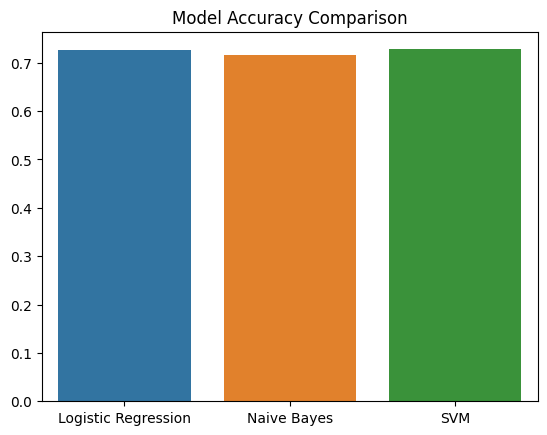

In [9]:
results = {}
for name, model in models.items():
    preds = model.predict(X_test_tfidf)
    results[name] = accuracy_score(y_test, preds)

sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.show()


In [12]:
final_model = LogisticRegression(max_iter=200)
final_model.fit(X_train_tfidf, y_train)

sample = ["I am facing issues with my mortgage payments."]
sample_vec = tfidf.transform(sample)
print("Prediction:", final_model.predict(sample_vec))


Prediction: [3]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


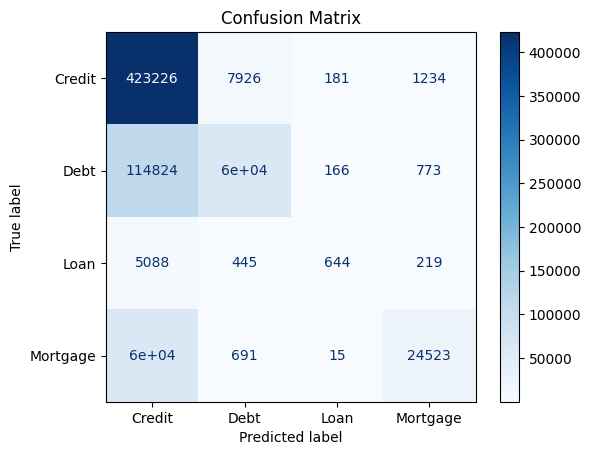

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = final_model.predict(X_test_tfidf)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Credit','Debt','Loan','Mortgage'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


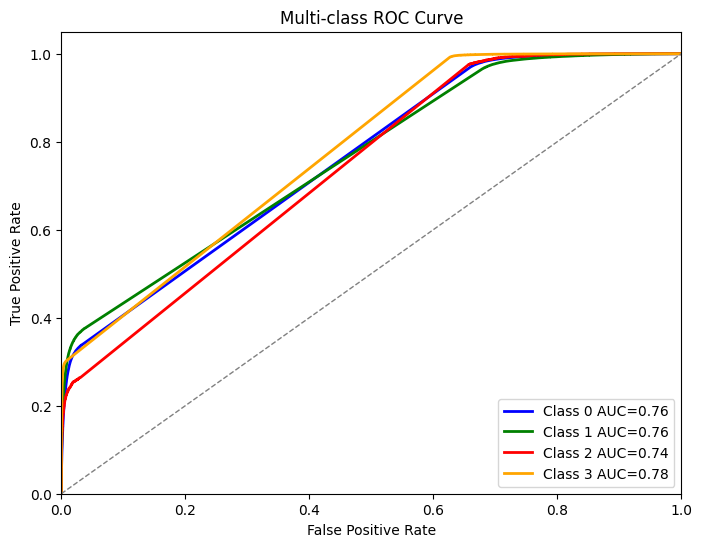

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
y_score = final_model.predict_proba(X_test_tfidf)  # probability estimates

# Plot ROC for each class
plt.figure(figsize=(8,6))
colors = ['blue','green','red','orange']
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} AUC={roc_auc:.2f}')

plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [17]:
# Map numeric labels to actual categories
label_map = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

# Your test samples
test_samples = [
    "I was charged extra fees on my credit card statement that I did not authorize.",
    "Debt collector keeps calling me despite me asking them to stop.",
    "My mortgage payment was applied incorrectly and caused late fees.",
    "The loan company denied my personal loan application without reason.",
    "My credit report has incorrect information affecting my credit score.",
    "I received threatening calls from a debt collection agency.",
    "Mortgage company refused to process my refinance request.",
    "I was overcharged for my auto loan and the company won't refund me.",
    "Credit bureau did not correct my identity theft issue in my report.",
    "Debt collector reported false information to credit bureaus."
]

# Make predictions
for text in test_samples:
    vec = tfidf.transform([text])           # convert text to TF-IDF
    pred_label = final_model.predict(vec)[0]  # get numeric label
    print(f"Text: {text}\nPredicted Category: {label_map[pred_label]}\n")


Text: I was charged extra fees on my credit card statement that I did not authorize.
Predicted Category: Debt collection

Text: Debt collector keeps calling me despite me asking them to stop.
Predicted Category: Debt collection

Text: My mortgage payment was applied incorrectly and caused late fees.
Predicted Category: Mortgage

Text: The loan company denied my personal loan application without reason.
Predicted Category: Mortgage

Text: My credit report has incorrect information affecting my credit score.
Predicted Category: Credit reporting, repair, or other

Text: I received threatening calls from a debt collection agency.
Predicted Category: Debt collection

Text: Mortgage company refused to process my refinance request.
Predicted Category: Mortgage

Text: I was overcharged for my auto loan and the company won't refund me.
Predicted Category: Consumer Loan

Text: Credit bureau did not correct my identity theft issue in my report.
Predicted Category: Credit reporting, repair, or oth